In [44]:
# Importing modules
import pandas as pd
import os
import praw
import pandas as pd
import datetime as dt
from elasticsearch import Elasticsearch
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from operator import itemgetter
import math
import datetime
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [45]:
creditSuisse = pd.read_csv('credit_suisse_hackathon_selenium.csv')
ninjavan = pd.read_csv('linkedin_code_dojo.csv')
accenture = pd.read_csv('linkedin_AccentureInnovationChallenge.csv')
#dell = pd.read_csv('linkedin_dell_Selenium.csv')
jp = pd.read_csv('linkedin_JP.csv')
life_saver = pd.read_csv('linkedin_life_savers_Selenium.csv')
meta = pd.read_csv('linkedin_meta.csv')
shopee = pd.read_csv('linkedin_shopee_code_league.csv')
sia = pd.read_csv('SIA.csv')
#hackathons = pd.read_csv('linkedin_hackathon.csv')

In [46]:
data = pd.concat([creditSuisse,ninjavan,accenture,dell,jp,life_saver,meta,shopee,sia])

In [47]:
data.head()

,post,background
0,"Last weekend, Perlyn Chew, Ryan Wong and I too...",Computer Science Undergraduate at NUS
1,FIS in India is proud to announce the successf...,Alliances Head at FIS
2,Credit Suisse Global Coding Challenge Batch: ...,Senior Talent Acquisition Specialist
3,"Hello great people👐, Hope you all are doing...",GSSoC'22 ||GDSC team member ||Open Source💜 ||5...
4,"Hello #connections , I am Ronak Jethava - A...",Actively Finding SDE/SWE/FullStack intern | Ha...


In [72]:
#Tokenize words
all_filtered_sentence = []
for d in data['post']:
    # Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",d)
    #Tokenization
    word_list = nltk.word_tokenize(review_text)
    #print (word_list)
    
    # Lemmatize list of words
    lemmatized_output = [lemmatizer.lemmatize(w) for w in word_list]
    #print(lemmatized_output)
    
    stops = set(stopwords.words("english"))  
    
    filtered_sentence = ' '.join([w for w in lemmatized_output if not w.lower() in stops])
    all_filtered_sentence.append(filtered_sentence)
 
    print(filtered_sentence)

data['description_filtered'] = all_filtered_sentence

Last weekend Perlyn Chew Ryan Wong took part Credit Suisse CodeIT Challenge came st lot fun working coding challenge Great job team thank Credit Suisse organising wonderful event
FIS India proud announce successful completion CODE FEST event wa hosted virtually period two month participant worked specific challenge leveraged skill Java Net develop innovative solution challenge given coding challenge qualifier company like Google Amazon Adobe Morgan Stanley Walmart KPMG Credit Suisse Deloitte Oracle top winner announced virtual award ceremony presence leader Many congratulation winner participant special thanks event hosting partner Mercer Mettl colleague support Meet winner
Credit Suisse Global Coding Challenge Batch Intern FTE Offers Apply http lnkd ZKNxp
Hello great people Hope great major internship open source program held throughout year respective timeline Days Google Cloud Google Adobe Analytics Challenge Adobe India Women Technology Scholarship Advent Code Alexa Prize Amazon Am

Mind Set Tool Set Skill Set position impactful say next guest Daphne E Jones Click Listen http lnkd etcXJpk utilizes three game changing idea stand overcome thought good enough succeed chosen field Jones empowers underserved undervalued overlooked listening people put limit label head heart gut leader asks know business strategic much care empathy compassion Challenging status quo emotional intelligence intellectual curiosity making complex simple Jones value unique experience perspective help community grow Speak language audience influencing create alignment Win say Daphne E Jones Learn Transform position path change business career outcome Daphne E Jones seasoned executive extensive experience implementing digital technology drive market growth seamless customer fulfillment internal efficiency within Fortune corporation ha thirty year experience general management executive level role IBM Johnson Johnson Hospira Pfizer General Electric tenure GE served SVP Future Work SVP CIO co led

nato Talent Garden Bari La Puglia uno degli ecosistemi pi effervescenti livello nazionale e con startup al nono posto nella classifica nazionale per numero di imprese innovative e la provincia di Bari ne la capofila Il nuovo spazio nato grazie alla collaborazione con e rappresenta un tassello significativo nell importante sforzo del territorio di creare ambienti relazioni e opportunit di formazione e crescita professionale per giovani e professionisti di qualsiasi et La prima sede di Talent Garden del sud Italia da luce un concept totalmente nuovo Uno spazio di co learning polifunzionale ad accesso libero che si prepara essere epicentro di innovazione e formazione Il progetto nasce per rispondere alle politiche di sviluppo del Sud che non possono prescindere dal digitale e per dare innovatori startup e aziende gli strumenti e le competenze per promuovere una trasformazione anche interno delle aziende pi tradizionali Al centro delle attivit del nuovo spazio di co learning programmi form

Hello Everyone overwhelmed inform received Internship offer join JPMorgan Chase Co Software Engineer Intern summer hackathon selection process wa great learning experience looking forward learn lot would like thank mentor Santanu Ghosh constant support guidance throughout event Also would like express gratitude towards placement cell providing Oppurtunity immensely grateful opportunity looking forward great learning experience JPMorgan Chase Co also like express heartfelt gratitude guidance throughout process
Always wonderful experience part CFG meeting young talent across university get learn lot wa exciting day codeforgood person event really different
hackthemountains codeforgood mlh
amazing recess week attending codeforgood JPMorgan Chase Co Giving back society ha always passion mine glad opportunity work group likeminded student Singapore Super grateful team mentor may hackathon hopefully fun
Grateful part JPMorgan Chase Co inaugural DEVUP engineering conference tech centre Plano 

Welcome today Crunch news corner let get going partnering focused help retailer reach million customer provide reward new channel fintech investor located Frankfurt ha raised million third fund target early growth stage company EU fintech insurtech sector Bulgaria first ever unicorn ha raised million fund tipping expense payment management billion valuation mark raised million latest Series funding round Dressing impress still much relevant metaverse debuted luxury crypto hardware fall menswear fashion show metaverse seems great idea say ambition possible without better network Subscribe newsletter like daily update news compiled curated Like comment share post got value
January despite first month wa super exciting one come world Blockchain Cryptocurrency Top story miss look working stablecoin See whether Crypto Look B acquisition Metaverse Look aka Facebook saying Carpe Diem last time interesting news development latest Month Blockchain Crypto
latest news insight AI issue U dominate 

In [74]:
data

,post,background,description_filtered,description_filtered2
0,"Last weekend, Perlyn Chew, Ryan Wong and I too...",Computer Science Undergraduate at NUS,Last weekend Perlyn Chew Ryan Wong took part C...,"[last, weekend, perlyn, chew, ryan, wong, took..."
1,FIS in India is proud to announce the successf...,Alliances Head at FIS,FIS India proud announce successful completion...,"[fis, india, proud, announce, successful, comp..."
2,Credit Suisse Global Coding Challenge Batch: ...,Senior Talent Acquisition Specialist,Credit Suisse Global Coding Challenge Batch In...,"[credit, suisse, global, coding, challenge, ba..."
3,"Hello great people👐, Hope you all are doing...",GSSoC'22 ||GDSC team member ||Open Source💜 ||5...,Hello great people Hope great major internship...,"[hello, great, people, hope, great, major, int..."
4,"Hello #connections , I am Ronak Jethava - A...",Actively Finding SDE/SWE/FullStack intern | Ha...,Hello connection Ronak Jethava final year stud...,"[hello, connection, ronak, jethava, final, yea..."
...,...,...,...,...
29,Calling startups worldwide! The Singapore Airl...,"4,886 followers",Calling startup worldwide Singapore Airlines A...,"[calling, startup, worldwide, singapore, airli..."
30,Video never felt so light! Singapore Airlin...,793 followers,Video never felt light Singapore Airlines shar...,"[video, never, felt, light, singapore, airline..."
31,Just an FYI! Kyndryl is proud to partner with...,"Digital Relationship Manager, Kyndryl-North Am...",FYI Kyndryl proud partner Singapore Airlines s...,"[fyi, kyndryl, proud, partner, singapore, airl..."
32,Calling tertiary students worldwide! The Singa...,"4,886 followers",Calling tertiary student worldwide Singapore A...,"[calling, tertiary, student, worldwide, singap..."


In [51]:
data.to_csv('Linkedin_all_competitor.csv', encoding='utf-8')

In [53]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words]for doc in texts]

In [55]:
df = data
da = df['description_filtered'].values.tolist()
data_words = list(sent_to_words(da))# remove stop words
df['description_filtered2'] = data_words
df

,post,background,description_filtered,description_filtered2
0,"Last weekend, Perlyn Chew, Ryan Wong and I too...",Computer Science Undergraduate at NUS,Last weekend Perlyn Chew Ryan Wong took part C...,"[last, weekend, perlyn, chew, ryan, wong, took..."
1,FIS in India is proud to announce the successf...,Alliances Head at FIS,FIS India proud announce successful completion...,"[fis, india, proud, announce, successful, comp..."
2,Credit Suisse Global Coding Challenge Batch: ...,Senior Talent Acquisition Specialist,Credit Suisse Global Coding Challenge Batch In...,"[credit, suisse, global, coding, challenge, ba..."
3,"Hello great people👐, Hope you all are doing...",GSSoC'22 ||GDSC team member ||Open Source💜 ||5...,Hello great people Hope great major internship...,"[hello, great, people, hope, great, major, int..."
4,"Hello #connections , I am Ronak Jethava - A...",Actively Finding SDE/SWE/FullStack intern | Ha...,Hello connection Ronak Jethava final year stud...,"[hello, connection, ronak, jethava, final, yea..."
...,...,...,...,...
29,Calling startups worldwide! The Singapore Airl...,"4,886 followers",Calling startup worldwide Singapore Airlines A...,"[calling, startup, worldwide, singapore, airli..."
30,Video never felt so light! Singapore Airlin...,793 followers,Video never felt light Singapore Airlines shar...,"[video, never, felt, light, singapore, airline..."
31,Just an FYI! Kyndryl is proud to partner with...,"Digital Relationship Manager, Kyndryl-North Am...",FYI Kyndryl proud partner Singapore Airlines s...,"[fyi, kyndryl, proud, partner, singapore, airl..."
32,Calling tertiary students worldwide! The Singa...,"4,886 followers",Calling tertiary student worldwide Singapore A...,"[calling, tertiary, student, worldwide, singap..."


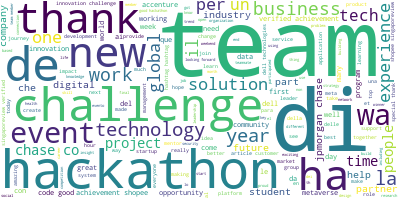

In [101]:
from wordcloud import WordCloud# Join the different processed titles together.
#join title and body
long_string = ''
for index, row in df.iterrows():
    #print(row['description_filtered2'])
    long_string += ','.join(row['description_filtered2'])
#print(long_string)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [94]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View

from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"team" + 0.011*"hackathon" + 0.008*"wa" + 0.008*"like" + '
  '0.007*"thank" + 0.006*"challenge" + 0.006*"would" + 0.006*"dell" + '
  '0.006*"opportunity" + 0.006*"new"'),
 (1,
  '0.010*"hashtag" + 0.006*"team" + 0.006*"hackathon" + 0.004*"today" + '
  '0.004*"dell" + 0.004*"company" + 0.004*"ai" + 0.004*"coding" + '
  '0.004*"business" + 0.004*"wa"'),
 (2,
  '0.012*"team" + 0.012*"hackathon" + 0.010*"de" + 0.006*"di" + 0.006*"wa" + '
  '0.005*"il" + 0.005*"time" + 0.004*"la" + 0.004*"per" + 0.004*"experience"'),
 (3,
  '0.013*"team" + 0.009*"hackathon" + 0.007*"year" + 0.007*"wa" + '
  '0.005*"opportunity" + 0.004*"la" + 0.004*"one" + 0.004*"time" + '
  '0.004*"like" + 0.004*"challenge"'),
 (4,
  '0.008*"hackathon" + 0.007*"di" + 0.006*"challenge" + 0.005*"dell" + '
  '0.005*"un" + 0.005*"per" + 0.004*"global" + 0.004*"technology" + '
  '0.004*"year" + 0.004*"ha"'),
 (5,
  '0.011*"di" + 0.010*"singapore" + 0.008*"shopee" + 0.007*"achievement" + '
  '0.007*"view" + 0.007*"

In [95]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))# # this is a bit time consuming - make the if statement True

LDAvis_data_filepath = os.path.join('./davis_prepared_title')

# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './davis_prepared_title' +'.html')
LDAvis_prepared

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.083518 -0.002616       1        1  21.587412
9      0.007307  0.011316       2        1  15.754138
3      0.032546  0.003339       3        1  11.720941
8      0.021433  0.017944       4        1  11.361455
5     -0.058177 -0.007306       5        1   7.612007
2     -0.011329  0.055302       6        1   7.313200
6     -0.038008 -0.018932       7        1   7.118857
4     -0.013084 -0.020630       8        1   6.435254
1      0.025290 -0.040742       9        1   5.788997
7     -0.049497  0.002325      10        1   5.307738, topic_info=            Term        Freq       Total Category  logprob  loglift
6575          di  572.000000  572.000000  Default  30.0000  30.0000
811           de  463.000000  463.000000  Default  29.0000  29.0000
5623     hashtag   63.000000   63.000000  Default  28.0000  28.0000
393    singapore  215.000000  215.000000  Default  27.0000  27.0000
14147   verified  101.000000  101.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
2219          da   10.396494  163.472234  Topic10  -6.2736   0.1808
713     business   11.528161  258.869764  Topic10  -6.1703  -0.1755
234         year   12.528909  389.591545  Topic10  -6.0870  -0.5011
2405        dell   11.522607  352.983524  Topic10  -6.1708  -0.4861
18          team   12.432667  944.358586  Topic10  -6.0948  -1.3942

[871 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7805      1  0.813862      aaron
4573      3  0.265139   academia
4573      8  0.265139   academia
1753      1  0.166896  accenture
1753      2  0.123185  accenture
...     ...       ...        ...
234       7  0.071870       year
234       8  0.071870       year
234       9  0.028235       year
234      10  0.033368       year
7055      8  0.677862    youssef

[2425 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 4, 9, 6, 3, 7, 5, 2, 8])

In [98]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(df['description_filtered2'])# Create Corpus
texts = df['description_filtered2']# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View

from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"di" + 0.009*"challenge" + 0.009*"team" + 0.006*"singapore" + '
  '0.006*"hackathon" + 0.005*"wa" + 0.005*"la" + 0.005*"shopee" + 0.005*"per" '
  '+ 0.004*"achievement"'),
 (1,
  '0.008*"team" + 0.007*"hackathon" + 0.006*"challenge" + 0.006*"innovation" + '
  '0.005*"accenture" + 0.005*"di" + 0.005*"wa" + 0.004*"la" + 0.003*"new" + '
  '0.003*"good"'),
 (2,
  '0.011*"hackathon" + 0.008*"di" + 0.008*"team" + 0.008*"wa" + '
  '0.007*"experience" + 0.005*"de" + 0.005*"event" + 0.005*"per" + '
  '0.005*"technology" + 0.004*"challenge"'),
 (3,
  '0.010*"di" + 0.009*"hackathon" + 0.007*"team" + 0.007*"de" + 0.006*"shopee" '
  '+ 0.006*"la" + 0.005*"coding" + 0.005*"il" + 0.004*"per" + 0.004*"da"'),
 (4,
  '0.008*"team" + 0.008*"di" + 0.006*"de" + 0.006*"challenge" + '
  '0.005*"opportunity" + 0.005*"year" + 0.004*"student" + 0.004*"thank" + '
  '0.004*"hackathon" + 0.004*"la"'),
 (5,
  '0.009*"year" + 0.006*"hackathon" + 0.006*"wa" + 0.005*"team" + '
  '0.004*"global" + 0.004*"

In [99]:
LDAvis_data_filepath = os.path.join('./davis_prepared_body')

# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './davis_prepared_body' +'.html')
LDAvis_prepared

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.053721  0.034656       1        1  19.692236
0      0.019172  0.022624       2        1  15.574584
1     -0.013579  0.012646       3        1  10.791829
2      0.003719  0.020699       4        1   9.384920
4      0.015070  0.002324       5        1   9.236337
7      0.021117 -0.003276       6        1   9.110723
6     -0.050799 -0.048334       7        1   8.136451
3      0.050217 -0.009986       8        1   8.027131
5     -0.039839 -0.012749       9        1   7.329319
9      0.048643 -0.018603      10        1   2.716469, topic_info=            Term        Freq       Total Category  logprob  loglift
5623     hashtag   81.000000   81.000000  Default  30.0000  30.0000
6575          di  609.000000  609.000000  Default  29.0000  29.0000
4444          il  267.000000  267.000000  Default  28.0000  28.0000
811           de  495.000000  495.000000  Default  27.0000  27.0000
15321     shopee  203.000000  203.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
393    singapore    5.742934  226.724032  Topic10  -6.1973  -0.0699
213      student    5.564743  223.344822  Topic10  -6.2288  -0.0864
234         year    6.389483  404.298874  Topic10  -6.0906  -0.5417
483          new    5.309304  274.792954  Topic10  -6.2758  -0.3407
77            wa    5.449827  567.085176  Topic10  -6.2497  -1.0391

[846 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
13946      7  0.482478    abiodun
1753       1  0.118970  accenture
1753       2  0.170524  accenture
1753       3  0.233975  accenture
1753       4  0.047588  accenture
...      ...       ...        ...
3538       7  0.157502      youth
3538       8  0.105001      youth
3538       9  0.262503      youth
8312       4  0.397930      zecca
8312      10  0.397930      zecca

[2371 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 2, 3, 5, 8, 7, 4, 6, 10])